# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v5i1-unif869812

1. 5個變數

2. 認定條件是：同期的房價不會影響同期的sentiment

3. 用uniform(-10,10) seed 869812

### 環境設定

In [1]:
# 設定路徑
Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
#inv_tol = 1e-22

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: matrixcalc

Loading required package: lattice

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘pack

In [2]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 5-variable model
By <- data %>% select(interest_rate, permit, loan, Sentiment, hp) %>% as.matrix

### 模型設定

In [4]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [5]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.739412234,0.0000263549677,0.0000016481157,12.8661883,0.00157780999,0.2058125800,0.0000027925483,-0.00000150670791,-1.37766337,0.00037227209,-0.98135713
595.720535604,0.4902992893261,-0.0013168897154,-3839.2386321,105.96315170813,-691.0368022794,0.3508181528935,-0.00045077668058,-22121.45801205,-128.43304856583,8733.03170956
898.569179679,-5.2365916608942,1.5403310012009,687550.4448495,-903.07624719199,2333.0291613024,4.1560900739496,-0.57090240932766,1081851.30566025,575.99146027397,73629.51323134
-0.001820585,-0.0000002106869,0.0000000218669,0.5882432,0.00004166464,0.0005469696,0.0000002605605,-0.00000002506293,-0.01251142,-0.00009221357,0.02477925
-0.720966521,0.0000136431611,-0.0000028804660,94.7258456,1.25940976757,-0.1241455873,0.0002538225927,0.00000349788944,-139.67383993,-0.26380971388,1.54658981


0.2094021908,43.1662450,1714.87479,0.00032624980,-0.02924678
43.1662450355,1072159.6958630,3025331.39276,0.35619611958,1115.41428751
1714.8747937261,3025331.3927646,615915845.86923,6.18932969308,35.46975261
0.0003262498,0.3561961,6.18933,0.00002654587,0.00860039
-0.0292467778,1115.4142875,35.46975,0.00860039049,12.95967973


0.1897148053,39.1078801,1553.647249,0.00029557674,-0.026497081
39.1078801177,971358.3569357,2740898.526778,0.32270759552,1010.546277578
1553.6472490168,2740898.5267782,558009227.881521,5.60742690143,32.134989540
0.0002955767,0.3227076,5.607427,0.00002405011,0.007791807
-0.0264970807,1010.5462776,32.134990,0.00779180677,11.741248298


### AIC/SIC

In [6]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 23.66979

AIC,25.54529,24.60996,24.73958,24.67272
SIC,26.24971,25.90842,26.63861,27.17897
HQ,25.83131,25.13712,25.51048,25.69000


AIC SIC  HQ 
  2   2   2

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &0 &a_{33} &0 &a_{35}\\
a_{41} &a_{42} &a_{43} &a_{44} &0\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
    e_t^{expectation}\\
	e_t^{sp}
\end{array}
\right]
$$

In [7]:
### 5-variable model
# 如果不是Wold遞迴式 -> 自定義
Amat = diag(5)
Amat[2,1]  = NA;
Amat[3,1]  = NA; Amat[3,5]  = NA;
Amat[4,1]  = NA; Amat[4,2]  = NA; Amat[4,3]  = NA;
Amat[5,1]  = NA; Amat[5,2]  = NA; Amat[5,3]  = NA; Amat[5,4]  = NA;

Bmat = diag(5)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0,0
NA,1,0,0,0
NA,0,1,0,NA
NA,NA,NA,1,0
NA,NA,NA,NA,1


NA,0,0,0,0
0,NA,0,0,0
0,0,NA,0,0
0,0,0,NA,0
0,0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

### 1. 找起始值

為了得到合理的估計，在設定完認定條件後，依以下步驟蒐集seeds:

1. 給定一個seed，估 $\hat{A} , \hat{B}$ ，從normal或uniform隨機assign起始值

2. 如果 $se(\hat{A}), se(\hat{B})$ 存在，進入下一步，若否則回到第一步

3. 如果標準誤都小於2500，則存下這個seed

4. 直到存的seed總數大於100則迴圈終止

```R
### Brutal Force
seed_stored <- c()
i <- 162150
while(TRUE){
  set.seed(i)
  SVAR_AB_est <- try(VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal"), 
                     silent = TRUE)
  A0.Std <- try(SVAR_AB_est$A0.Std)
  B0.Std <- try(SVAR_AB_est$B0.Std)
  if(sum(is.na(A0.Std))==0 && sum(is.na(B0.Std))==0){
    if(max(A0.Std)<=2500 && max(B0.Std)<=2500){
      seed_stored <- rbind(seed_stored, i)
      cat("Seed: ", i, " found\n")
      write.csv(seed_stored, "seed_v5_identification2_Std2500.csv")
    }
  }
  i <- i+1
  if(length(seed_stored)>=3000){
    break
  }
  cat("Now in teration: ", i, "\n",
      "There are ", length(seed_stored), " seeds found", "\n")
}
```

### 2. 比標準誤大小

以下的程式可以從上面存下的seeds中計算出每個seed對應的 $\hat{A}, \hat{B}$ 的標準誤大小

```R
# 上面找到的seeds
seeds <- read_csv("/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/v5_identification1/seed_AB_std_smaller2500.csv")
```

```R
seeds = seeds$seed
```

```R
# 製作表
df_seeds <- matrix(NA, nrow = length(seeds), ncol = 3)
counter <- 1
for(seed in seeds){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "uniform")
  A0 <- SVAR_AB_est$A0.svar
  B0 <- SVAR_AB_est$B0.svar
  A0.Std <- SVAR_AB_est$A0.Std
  B0.Std <- SVAR_AB_est$B0.Std
  df_seeds[counter,1] <- seed
  df_seeds[counter,2] <- max(A0.Std)
  df_seeds[counter,3] <- max(B0.Std)
  counter <- counter+1
}
df_seeds <- as.data.frame(df_seeds)
colnames(df_seeds) <- c("seed", "A0.Std.Max", "B0.Std.Max")

print(df_seeds %>% arrange(A0.Std.Max))
```

### 3. 從變異數分解看Possible Seed

但標準誤小不見得就可以有好的估計的結果

下面的程式可以從已存下的seeds一個個輸出變異數分解的結果至一個純文字檔中

```R
getwd()
```

```R
# 看變異數分解
for(seed in seeds){
  set.seed(seed)
  SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "uniform")
  SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
  SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                         AMat, BMat, h=119,
                                         Const=TRUE, ddTheta = SVAR_AB_IRF)
  cat("Now in seed: ", file = "output_v5i1.txt",append = T);
  cat(seed, file = "output_v5i1.txt", append = T)
  cat("\n\n", file = "output_v5i1.txt", append = T)
  cat(SVAR_AB_VarDecomp*100, file = "output_v5i1.txt", append = T)
  cat("\n\n", file = "output_v5i1.txt", append = T)
}
```

# 找到的seed

從 uniform(-10,10) 抽出的好的seed:

311, 3227, 9176, 15848, 25581, 30714, 51517, 63129, 72757, 78156, 87802, 132505, 145176, 149853, 160493, 1319046, 

* 50613, 92746, 130215, 145887

* 162066, 232100, 1311963

In [16]:
set.seed(852636)
runif(15, -10, 10)

[1]  0.1217798  7.9721182 -1.3802014  8.9261554  5.5880022 -3.5674127
 [7] -6.1763134  3.5613198  9.1973571  1.4791749 -9.6132366 -3.5542619
[13]  9.1935792 -7.4358083  8.2280509

In [35]:
#set.seed(668852)
#set.seed(521367)
set.seed(412188)
SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "uniform")
A0 <- SVAR_AB_est$A0.svar
B0 <- SVAR_AB_est$B0.svar
A0.Std <- SVAR_AB_est$A0.Std
B0.Std <- SVAR_AB_est$B0.Std

## A, B Matrix

In [36]:
A0; B0
A0.Std; B0.Std

1.000000,0.0000000,0.000000000,0.0,0.0
-23.895292,1.0000000,0.000000000,0.0,0.0
-4.754248,0.0000000,1.000000000,0.0,-214536.5
1007.759507,23.0082831,-1.739571905,1.0,0.0
63.711018,0.1030756,0.001725713,-216636.3,1.0


0.4412088,0.00,0,0.00,0.0000
0.0000000,35936.57,0,0.00,0.0000
0.0000000,0.00,1074404,0.00,0.0000
0.0000000,0.00,0,41510.46,0.0000
0.0000000,0.00,0,0.00,820.1421


0.0000,0.00000000,0.000000000,0.000,0.000
1885.3104,0.00000000,0.000000000,0.000,0.000
1708.4184,0.00000000,0.000000000,0.000,2297.736
1288.1231,3.75976563,0.113944524,0.000,0.000
169.3283,0.07407228,0.003108606,1440.723,0.000


0.02733193,0.000,0.000,0.000,0.00000
0.00000000,1744.066,0.000,0.000,0.00000
0.00000000,0.000,2253.649,0.000,0.00000
0.00000000,0.000,0.000,523.206,0.00000
0.00000000,0.000,0.000,0.000,36.44748


## IRF (without Bootstrap C.I.)

In [31]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 25) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:5){
    for(i in 1:5){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [32]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))
p17 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V17))
p18 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V18))
p19 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V19))
p20 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V20))
p21 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V21))
p22 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V22))
p23 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V23))
p24 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V24))
p25 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V25))

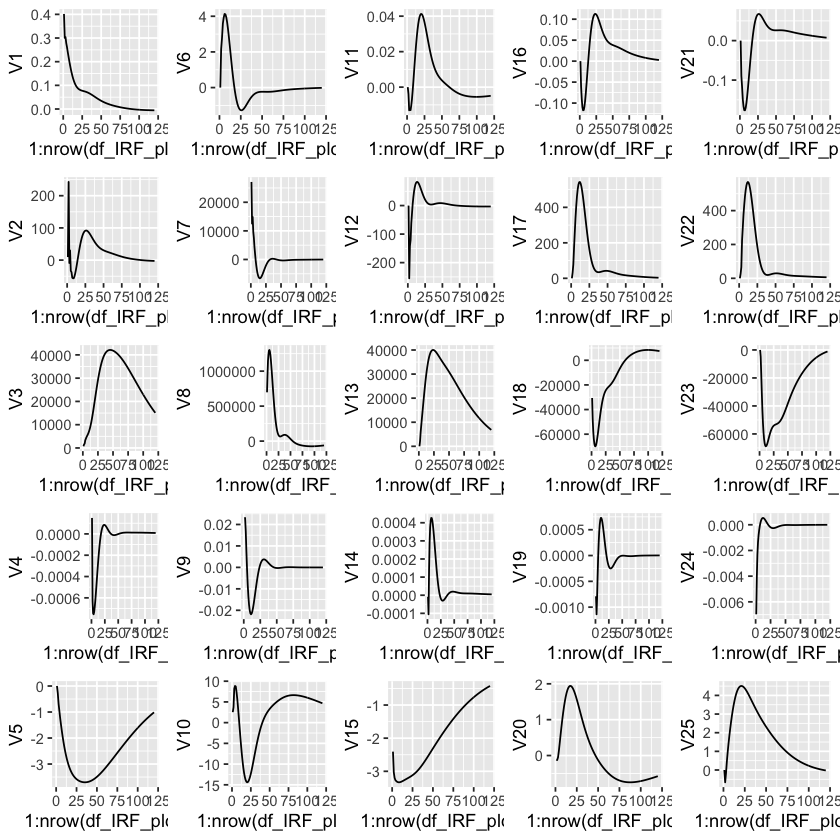

In [33]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

```R
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)
```

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

In [17]:
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)
# obs:119 lag:2 -> 117
# Y: 5 vairables
# X: 5個變數的t-1, t-2 -> 10 variables
dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 55 coef.
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU

#BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}
dm.U <- U-mean(U)
#dm.U = scale(U, scale = FALSE)                       # Step 2 減去殘差的平均數
N = 1000 #重抽次數
dim(ddX); dim(Coef.noc); dim(dm.U)
#Y.sim <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + dm.U

# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,25,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){
  rm(Y.sim); rm(SVAR_AB_est.sim)
#   cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ]
  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]
  
  Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = 117, ncol = 5, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###
  SVAR_AB_est.sim <- try(VAR.svarest.AB(Y.sim, VAR.P, Amat, Bmat, CONST, start = "normal"), silent = T)
  if(class(SVAR_AB_est.sim)=="try-error"){
#     print(Y.sim[length(Y.sim)])
#     print(U.sim[length(U.sim)])
#     print("Bad Trial")
    next
  }
  A0.Std.sim <- try(SVAR_AB_est.sim$A0.Std, silent = T)
  B0.Std.sim <- try(SVAR_AB_est.sim$B0.Std, silent = T)
#   cat(class(A0.Std.sim), "\t", class(B0.Std.sim), "\n")
  
  if(class(A0.Std.sim)=="try-error" | class(B0.Std.sim)=="try-error" ){
#     cat("This iteration turns out a bad result. Try next.\n")
    next
  }
  
  if(sum(is.na(A0.Std.sim))==0 && sum(is.na(B0.Std.sim))==0){
    #IRF
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
#     cat("This iteration turns out a proper result. \n
#         Estimate its IRF and save.\n")
  }else{
    next
  }
  # SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est.sim)
  # cat("This iteration turns out a proper result. \n
  #     Estimate its IRF and save.\n")
  
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, 25) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:5){
      for(i in 1:5){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}

[1] 117   5

[1] 117  10

[1] 117  10

[1]  5 10

[1] 117   5

In [18]:
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v5i1-unif162066.rds")

df_IRF.sim <- read_rds("/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R/seeds/v5_identification2/df_IRF.sim.rds")

In [35]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.4533359,709.9187,4214.205,0.0009973505,0.3466898,0.000000000,924.5256,2208.092,0.0002550035540,0.3998370,⋯,0.000000000000000782728,0.0000000000009926278,23066.41,-0.0004608627,4.176820,0.000000000,0.0000,-0.9839131,0.0059590151,-0.0001781651
0.2487131,434.7191,-1948.972,-0.0004172410,0.1663272,0.007895998,560.4882,-9275.069,-0.0000004073762,0.5666681,⋯,0.075055889974772707629,38.7661387397268981658,23954.09,0.0009049520,3.442676,0.007840760,-136.0279,9190.2296907,0.0004600773,-1.6617686392
0.2971894,310.2020,6622.880,-0.0006924487,-0.4114353,0.009573512,528.0239,-4777.732,-0.0002520612365,0.7243749,⋯,0.034221904344175914370,-160.1283770050220311987,18886.18,-0.0005362743,3.249083,-0.003059226,-165.2839,20805.1715412,0.0009974389,-1.9729985895
0.2712131,237.1498,6055.061,-0.0003673884,-0.3556085,0.034737620,440.6500,-6711.494,0.0001547543713,0.9771454,⋯,0.027901865422075185219,-236.4071744140027249159,20367.74,-0.0005473666,3.025898,0.020299225,-149.9913,22087.7394781,0.0005677982,-2.2045037957
0.2585493,166.5117,7830.840,-0.0006378634,-0.6404908,0.035950211,369.7331,-6702.133,-0.0001022522512,1.0459495,⋯,0.020773661212343558224,-297.2636208300709768082,16448.70,-0.0004841083,3.004334,0.005467264,-139.0291,24879.7482181,0.0002303935,-2.3979921249
0.2415649,110.1502,8895.096,-0.0005364541,-0.7795479,0.043982880,299.0743,-6558.585,-0.0000599091667,1.1139979,⋯,0.003084889126929745741,-337.9268585754077776073,13872.60,-0.0006216577,2.891344,0.010813961,-122.8192,26208.5212463,0.0002157670,-2.4849410799


### 畫IRF & Bootstrap C.I.

In [20]:
df_IRF_plot.BS.L <- matrix(NA, 120, 25)
df_IRF_plot.BS.U <- matrix(NA, 120, 25)
df_IRF_plot.BS.Median <- matrix(NA, 120, 25)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 25)
for(col in 1:25){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

```R
##### Plot #####

shock1y1 <- bind_cols(df_IRF_plot.BS.L$V1, df_IRF_plot.BS.U$V1,
                      df_IRF_plot.BS.Median$V1, df_IRF_plot.BS.Mean$V1, 
                      df_IRF_plot$V1)
colnames(shock1y1) <- c("Lower", "Upper", "Median", "Mean", "IRF")
ggplot(shock1y1) + 
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Median), col = "Blue")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Mean), col = "Red")
ggplot(shock1y1) +
  geom_line(aes(x = 1:nrow(shock1y1), y = IRF), col = "Red")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Lower), linetype = "dashed")+
  geom_line(aes(x = 1:nrow(shock1y1), y = Upper), linetype = "dashed")

```

In [21]:
ind <- 0
for(i in 1:5){
  for(j in 1:5){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") + geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='black')+geom_line(aes(x = 1:nrow(", nam, "), y = Mean), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4

New names:
* V12 -> V12...1
* V12 -> V12...2
* V12 -> V12...3
* V12 -> V12...4

New names:
* V13 -> V13...1
* V13 -> V13...2
* V13 -> V13...3
* V13 -> V13...4

New names:
* V14 -> V14...1
* V1

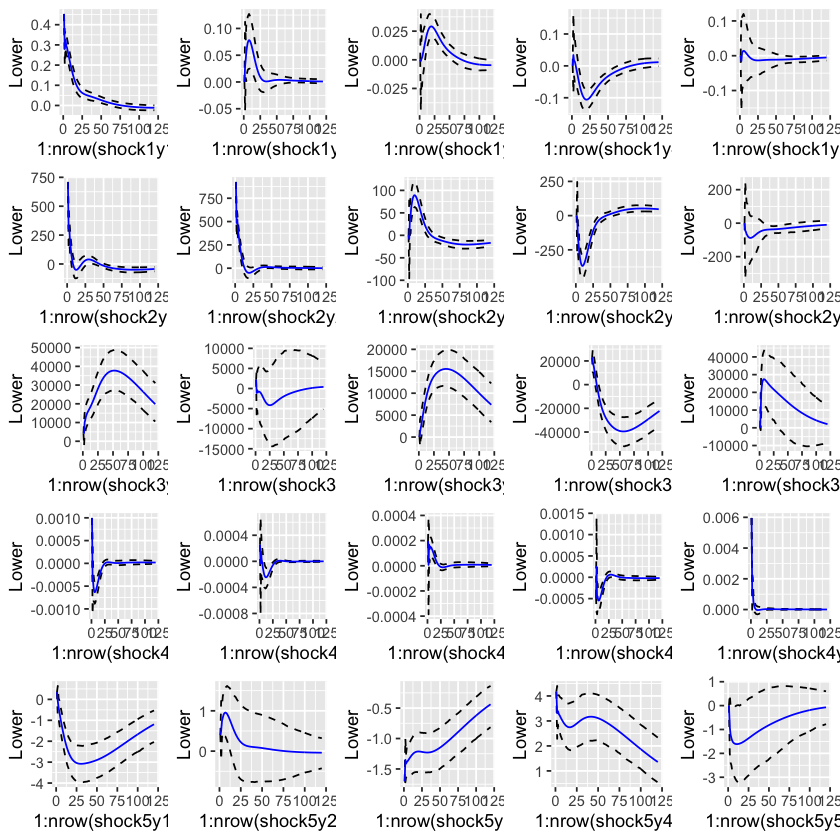

In [22]:
# p1
# p2
# p3
# p4
# p5
# p6
# p7
# p8
# p9
# p10
# p11
# p12
# p13
# p14
# p15
# p16
# p17
# p18
# p19
# p20
# p21
# p22
# p23
# p24
# p25

multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

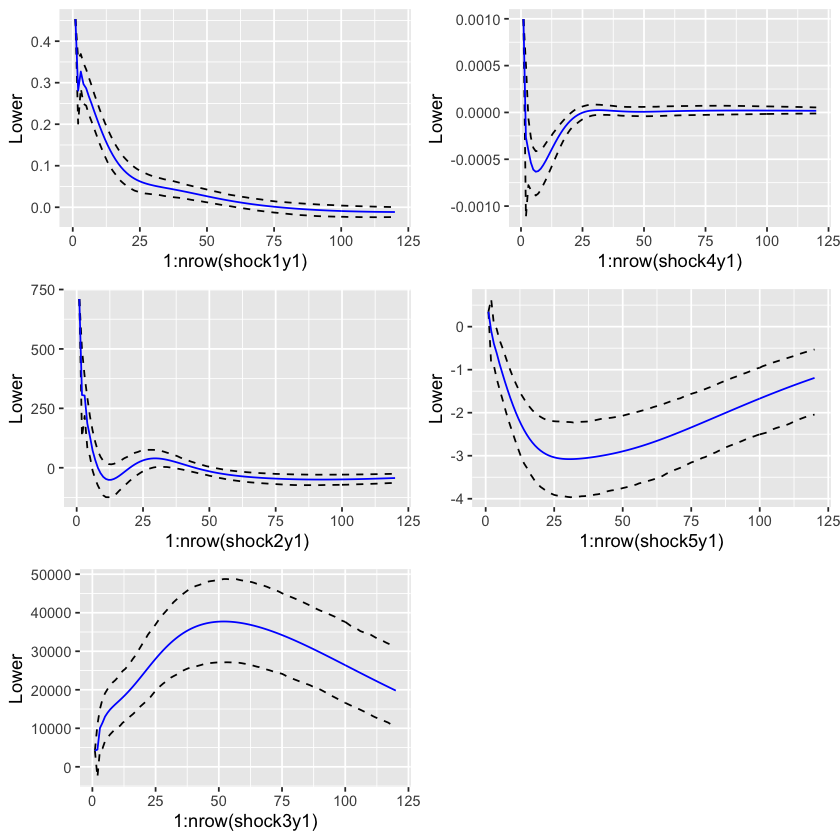

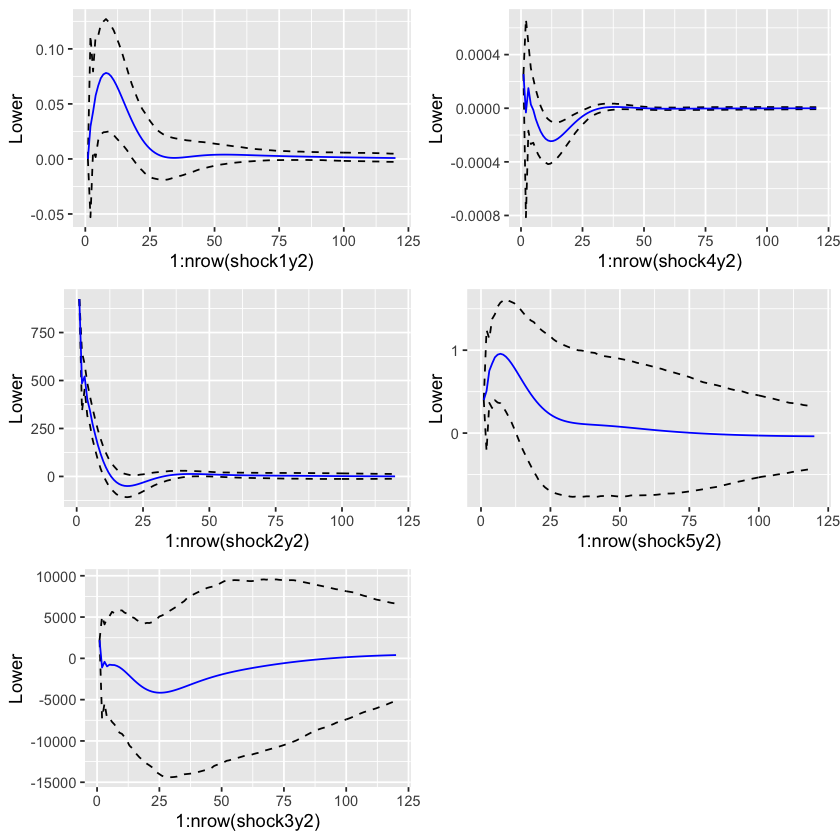

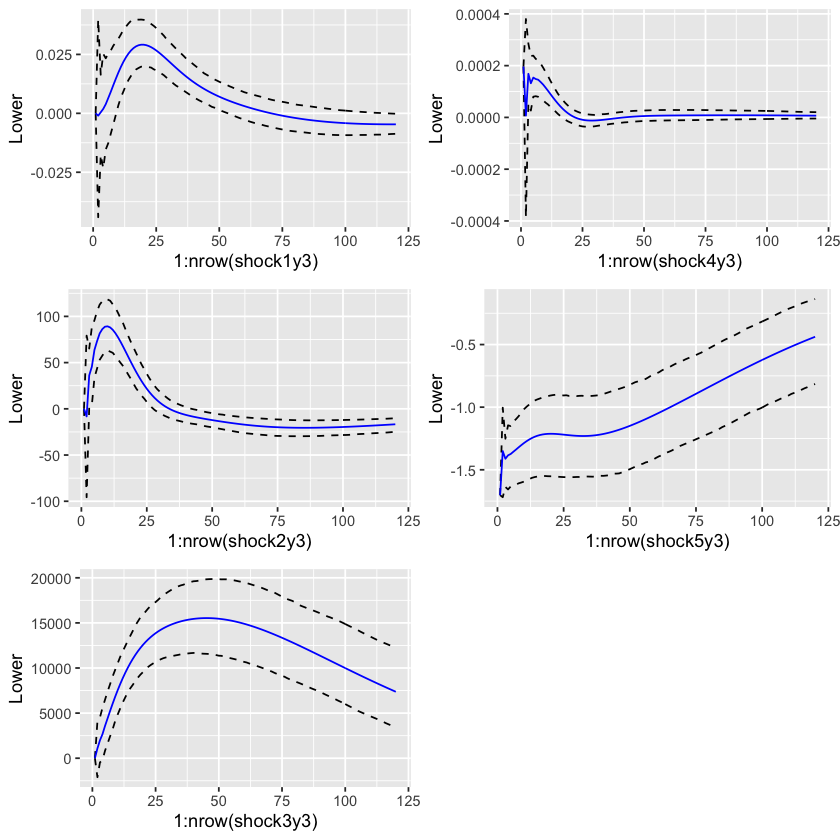

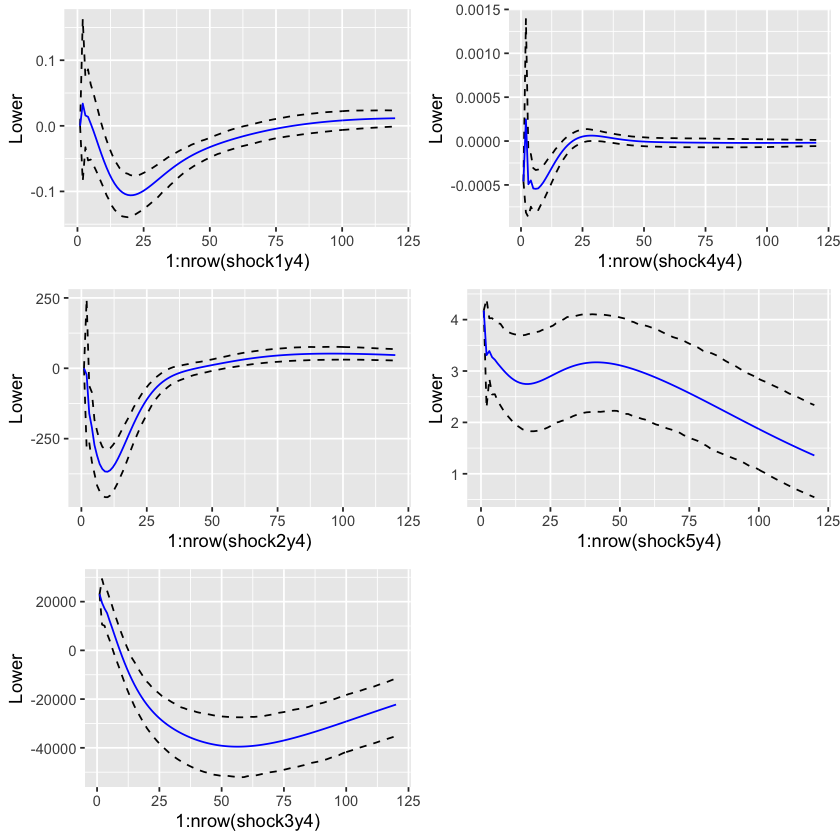

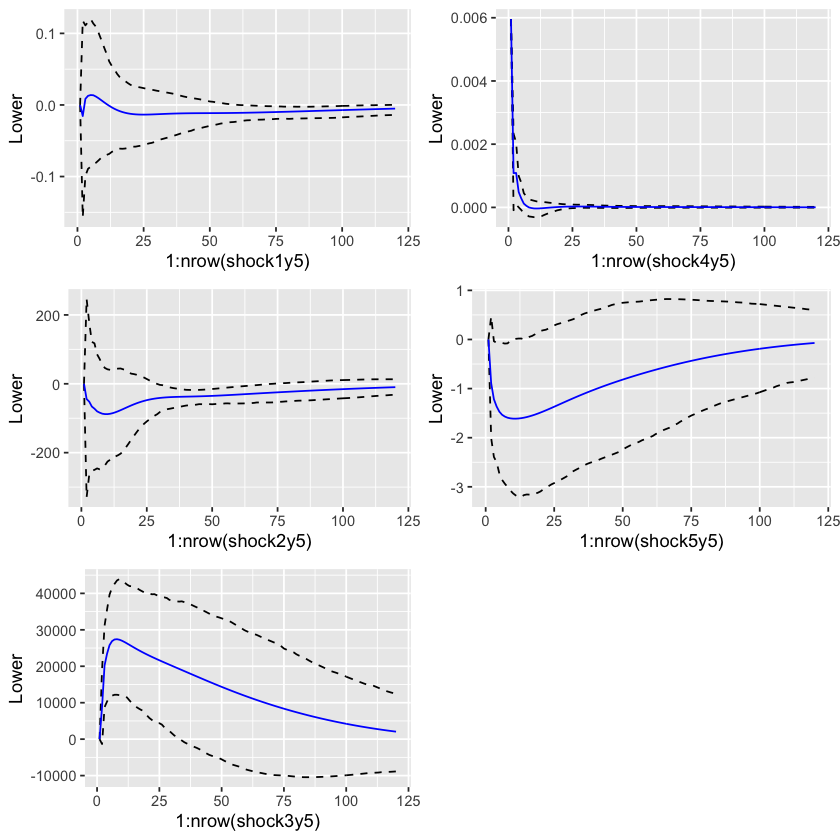

In [23]:
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)

## Variance Decomposition

In [37]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                       AMat, BMat, h=119,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
SVAR_AB_VarDecomp*100

h=1,0.00005371008,52.36007,47.538941,0.10093578,0.000000000000006128856
h=2,0.21129337356,56.38220,42.101763,0.07937362,1.225372628562501731153
h=3,0.48431087927,76.88270,22.197058,0.02734160,0.408585100587554372886
h=4,0.73463728048,81.30514,17.607551,0.02336998,0.329306299551377079649
h=5,1.04629249803,82.41401,15.925639,0.05746572,0.556595748820137292689
h=6,1.46220985725,81.53686,15.843104,0.13695455,1.020871844161605590529
h=7,2.01020754052,79.42243,16.564329,0.27190391,1.731132866533594327763
h=8,2.70730522128,76.31842,17.774529,0.47364840,2.726099244191971582296
h=9,3.53703534531,72.56628,19.142486,0.74542724,4.008775462504746478487
h=10,4.42676454925,68.72511,20.278174,1.07139210,5.498563260771831551210
h=11,5.24830365738,65.55136,20.783678,1.40997037,7.006692874979451701734


## Historical Decomposition

In [38]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  25

In [39]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,10465.00,1051038,0.005097271,98.1600
2,8.270000,17129.00,1073968,0.015780528,104.1600
,7.675291,17136.35,1084673,0.014417542,104.2331
,7.431884,17351.92,1131749,0.016005012,103.1554
,7.217294,17559.81,1196077,0.017739689,102.2756
,7.068041,17675.20,1270418,0.019299676,101.6163


[1] 119   5

[1] 119   5

In [40]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,permit,loan,Sentiment,hp
1,0.00000000,0.0000,0.00,0.000000000,0.000000
2,0.00000000,0.0000,0.00,0.000000000,0.000000
3,0.09137594,195.6465,26935.89,0.001708533,2.446907
4,-1.40921685,2822.0828,41512.46,0.002446206,6.834601
5,-0.84396048,1730.1946,34623.49,-0.004591036,10.934421
6,0.65062518,7036.8030,67892.13,-0.001928391,16.203727


In [41]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,6,11,16,21)])

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
0.08320592,1.953932,147.5595,0.00003098386,0.0005297446
-1.35117508,17.077518,-2193.8976,-0.00065673341,-0.0657835349
-0.96146102,-854.980189,-4865.6054,0.00207327325,0.8220681557
0.43256711,90.610873,-3257.4228,0.00294140829,2.2097710457


In [42]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,5], 
      (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])

1,0.000000,NA
2,0.000000,NA
3,2.446907,0.0005297446
4,6.834601,-0.0657835349
5,10.934421,0.8220681557
6,16.203727,2.2097710457
7,18.147015,2.1357668564
8,18.238022,1.9577123930
9,18.590100,2.7932288236
10,16.544997,3.1157694776
11,24.003994,3.1085808445


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



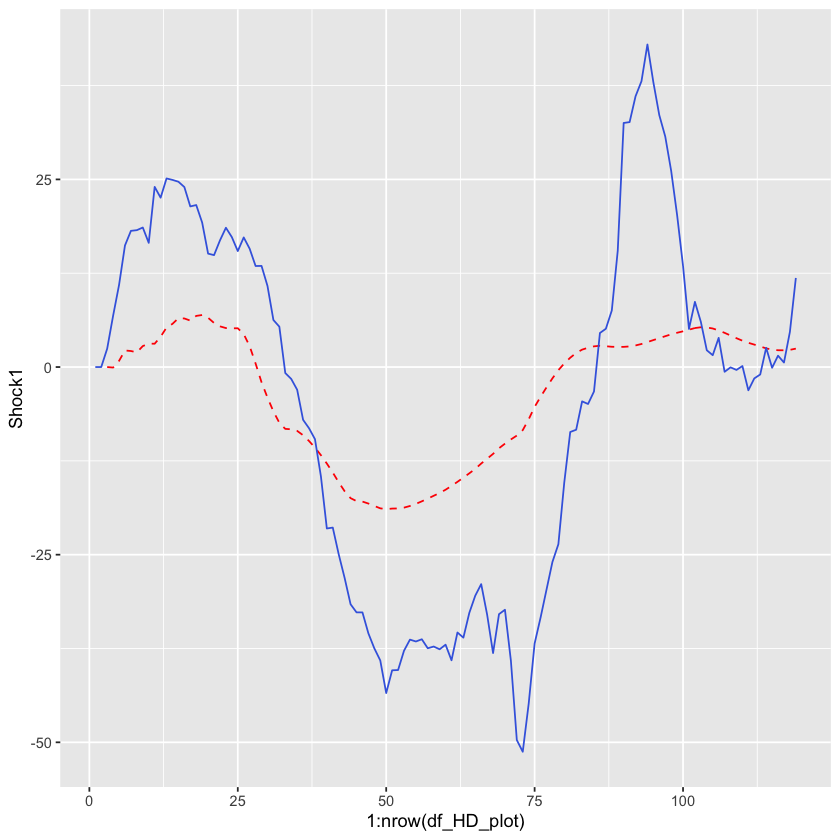

In [43]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')


### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



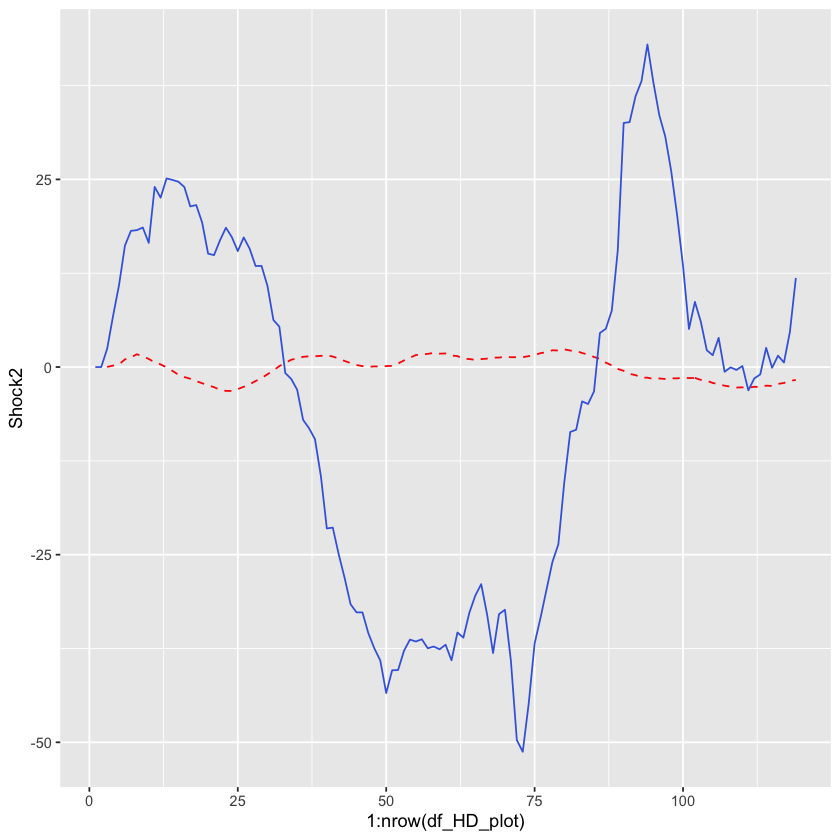

In [44]:
# ## shock2: housing price expectation shock
# SVAR_AB_HistDecomp[,c(2,7,12,17,22)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock2 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



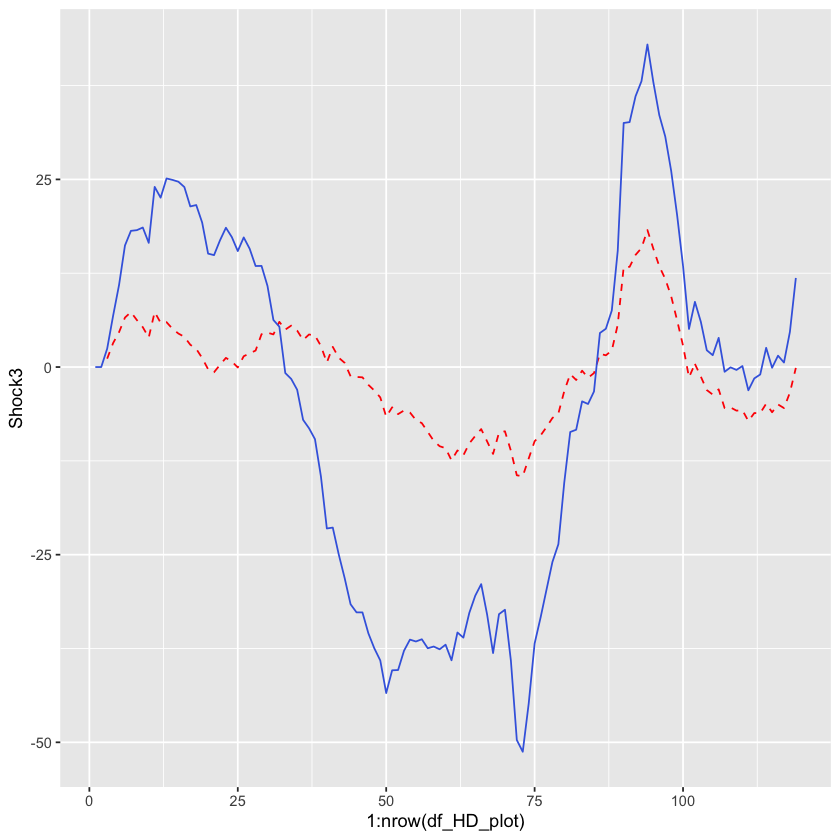

In [45]:
# ## shock3: supply shock
# SVAR_AB_HistDecomp[,c(3,8,13,18,23)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock3 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing price expectation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



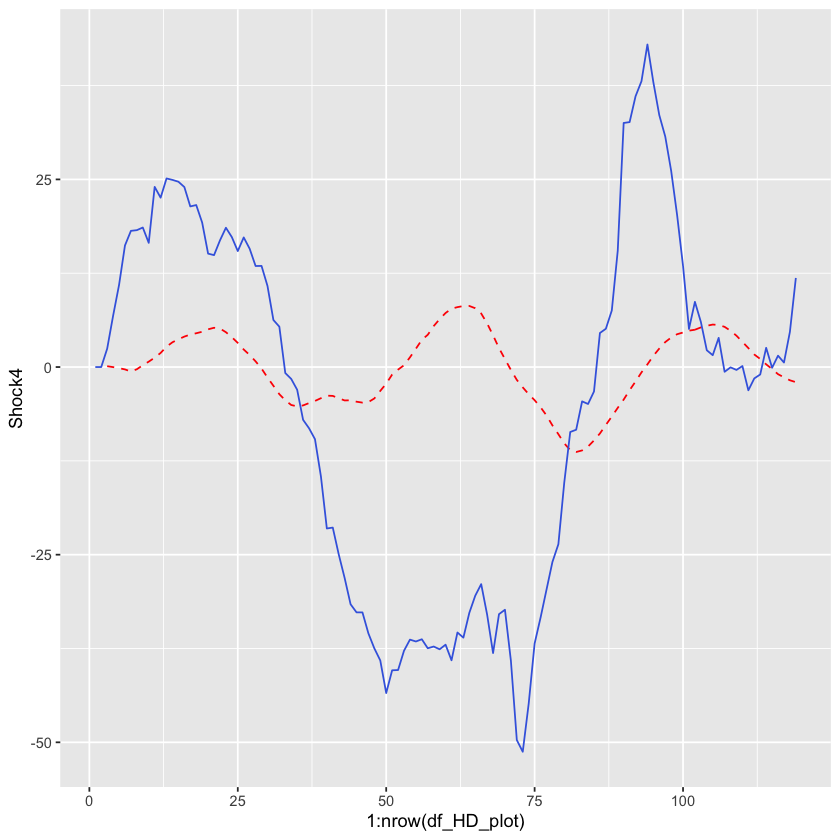

In [46]:
# ## shock4: demand shock
# SVAR_AB_HistDecomp[,c(4,9,14,19,24)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock4 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



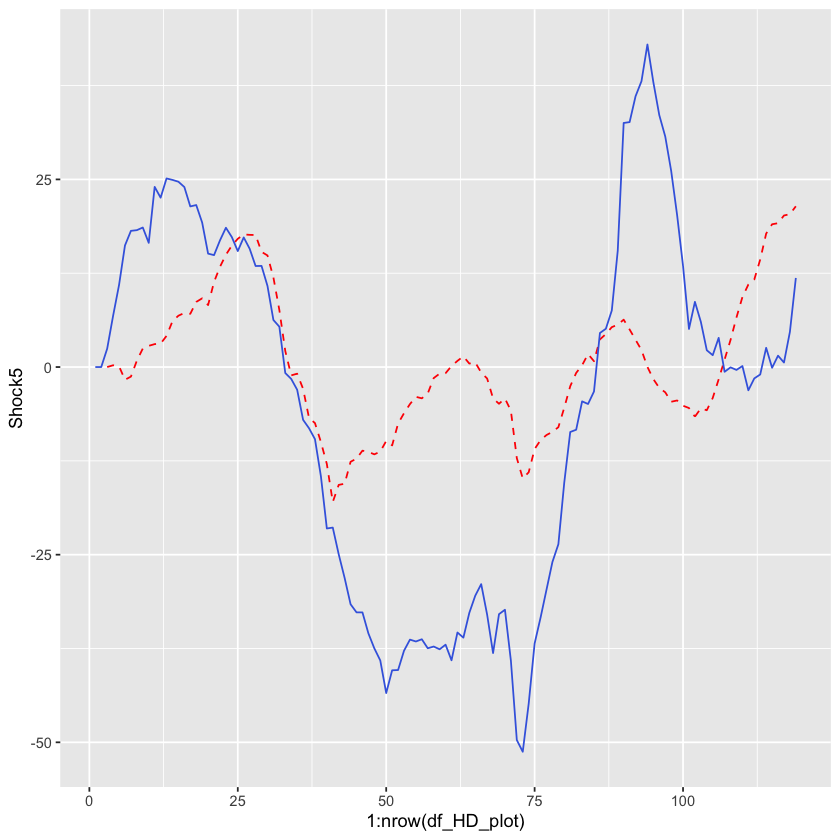

In [47]:
## shock5: housing speculation shock
#SVAR_AB_HistDecomp[,c(5,10,15,20,25)]-SVAR_AB_Hist.c0
## baseline上 hp 的變化
#(By-SVAR_AB_Hist.c0)[,5]
## shock5 對 hp 的衝擊
#(SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock5")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock5), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')